In [2]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [11]:
# import dataset
data = pd.read_csv('Life_Expectancy_Data.csv')

## Length of the code {-}
No restriction

**Delete this section from the report, when using this template.** 

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Adam Ruzumna*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [12]:
#...Distribution of continuous variables...#
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [14]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Developing    2426
Developed      512
Name: Status, dtype: int64


<AxesSubplot:xlabel='Status', ylabel='count'>

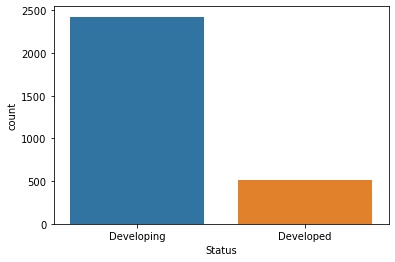

In [22]:
# Distribution of categorical variables
print(data['Status'].value_counts())

# Visualization of the distribution of the categorical variable
sns.countplot(x='Status', data=data)

In [13]:
#...Association of the response with the predictors...#
data.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [17]:
# Amount of missing data before any cleaning
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Data cleaning
*By Adam Ruzumna*

From the data quality check we realized that:

1. For `population`, `bmi`, and `infant_deaths`, we found that the dataset contained enough inaccurate data where the variables were not worth including. For infant_deaths in particular, the mean value was 30.3 deaths per 1000 births-- despite the world's current highest value being 27. Population and bmi had similarly suspect values. Some of these were found by manually inspecting the data.

2. For `hepatitis_b`, `alcohol`, and `total_expenditure`, the data was not inaccurate, but these variables had little correlation to our variable of interest and they had a number of missing values. Thus, we decided that they were better to exclude from our dataset rather than drop the entire row because of on missing value. We were hesitant to impute values for these variables, since we felt that countries situations are too complex for us to assume a particular value.

3. Next, we dropped the missing values from the `gdp_per_capita` and'income_composition_of_resources' columns. These variables were both important for our model, and thus felt they were important to include.

4. The `gdp_per_capita` and `under_five_deaths` variables were generally consistent, but had some suspect data points. We needed to filter `gdp_per_capita` to be above 108 -- the lowest value at the time period-- and filter `under_five_deaths` to be below 225 -- the highest value for the time period.

5. Finally, we had to change the names of all of our columns to be in a consistent manner that clearly depicted not only the content of the data, but also allowed us to run the code smoothly.

The code below implements the above cleaning.

In [4]:
# clean column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# rename gdp column to make data more understandable
data = data.rename(columns={'gdp': 'gdp_per_capita'})

# rename HIV/AIDs column to make it usable
data = data.rename(columns={'hiv/aids': 'hiv_aids'})

# rename thinness 1-19 column to make it usable
data = data.rename(columns={'thinness__1-19_years': 'thinness_1_19_years'})

# rename thinness 5-9 column to make it usable
data = data.rename(columns={'thinness_5-9_years': 'thinness_5_9_years'})

# rename under five deaths column to make it usable
data = data.rename(columns={'under-five_deaths': 'under_five_deaths'})


/var/folders/p0/ppz0yj5s4qz65pfjbd7vtldh0000gn/T/ipykernel_44711/3239250164.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/p0/ppz0yj5s4qz65pfjbd7vtldh0000gn/T/ipykernel_44711/3239250164.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [5]:
# Drop columns with suspect data

# Dropping 'population' column
data.drop(columns=['population', 'bmi', 'infant_deaths', 'percentage_expenditure', 'hepatitis_b', 'alcohol', 'total_expenditure'],inplace=True)
    # population: data inconsistent and inaccurate
    # bmi: max bmi is over 80, which does not make sense -- lots of values like this
    # infant_deaths: mean value is 29-- true world highest value is 27
    # percentage_expenditure: seems very inaccurate, large number of values over 100%

In [6]:
# Additional Cleaning -- Dropping Missing Values

# drop missing gdp, life_expectancy, income_composition_of_resources values, 
data = data.dropna(subset=['gdp_per_capita','income_composition_of_resources'])

In [7]:
# Dropping rows with unreasonable gdp_per_capita values
    # the number 108 is chosen because an outside source confirmed that the lowest
    # gdp per capita during this time period is 108
data = data.loc[data.gdp_per_capita >= 108]

# Dropping rows with unreasonable under_five_deaths values
    # the number 180 is chosen because an outside source confirmed that the highest value should be 225 for this period
data = data.loc[data.under_five_deaths <= 225]

In [9]:
# reset the index numbers

data = data.reset_index(drop=True)
data = data.dropna()

### Data preparation
*By Adam Ruzumna and Judd Moss*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

- Adding in continents to be a categorical variable

In [9]:
# add in continents to be a categorical variable
continents_df = pd.read_csv('gdp_lifeExpectancy.csv')
continents = continents_df[['country', 'continent']]
continents.head(1)

,country,continent
0,Afghanistan,Asia


In [10]:
data = pd.merge(data, continents, on='country')

NameError: name 'data' is not defined

In [ ]:
data.head(1)

In [ ]:
# dividing data into 80% training, 20% test
np.random.seed(2)
train = data.sample(round(data.shape[0]*0.8)) # 80% training, 20% test
test = data.drop(train.index)

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [2]:
# Exploring different distributions of life expectancy by continent - Judd Moss
sns.displot(data = train, x = 'life_expectancy',kind = 'kde', hue='continent').set_titles("Life Expectancy Distribution by Continent")
plt.show()

NameError: name 'train' is not defined

In [ ]:
# check the correlation with life_expectancy and the potential predictors - Judd Moss
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(train.corr(), cmap='tab10')

- The variable most correlated with life expectancy was `income_composition_of_resources` so we wanted to check its distribution since it was on a 0-1 scale to see where most countries fell on the scale

In [3]:
# check scatterplot of income_composition_of_resources and life expectancy - Judd
ax = sns.scatterplot(data = train, x = 'income_composition_of_resources',y = 'life_expectancy', hue='continent')
ax.set_title("Life Expectancy by Continent")
plt.show()

NameError: name 'train' is not defined

- `income_composition_of_resources` measures on a scale of 0 to 1, a countries ability to utilize its resources. We can see many of the countries with values of `income_composition_of_resources` have a higher life expectancy. 

## Developing the model
*By Judd Moss and Alissa Chu*

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

**Addressing Multicollinearity**
- In the following code chunk, we tested the multicollinearity of the predictors that could be used in our regression model. Since many of the healthcare variables were related we suspected the predictors would exhibit some collinearity. To check this, we computed their VIF values

In [ ]:
#Predictors VIF will be caluclated for:

X = train[['adult_mortality','measles', 'under_five_deaths', 'polio', 'diphtheria', 'hiv_aids', 
           'gdp_per_capita', 'thinness_1_19_years', 'thinness_5_9_years',
           'income_composition_of_resources', 'schooling']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# add constant column
X = add_constant(X)
# create empty dataframe to input VIF values
vif_data=pd.DataFrame()
# create row for each predictor in X
vif_data['predictor'] = X.columns

# for loop to fill in VIF values 
for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values,i)
    
print(vif_data)

- We then checked which variables were most correlated with `life_expectancy` to decide which variables with high VIF levels to remove. It appears `thinness_1_19_years`, `thinness_5_9_years`, `income_composition_of_resources`, and `schooling` exhibit multicollinearity. Based on their correlations with `life_expectancy`, we will remove `thinness_5_9_years` and `schooling` since they are less correlated with `life_expectancy`. 

**Model Selection**
- We ran a forward stepwise selection algorithm to help determine which variables we should use in our model.

In [ ]:
#Creating a dataframe with all the predictors
X = train[['adult_mortality', 'measles', 'under_five_deaths', 'polio', 'diphtheria', 'hiv_aids', 'gdp_per_capita', 'thinness_1_19_years', 'income_composition_of_resources']]

In [ ]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('life_expectancy~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [ ]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    return models_best

In [ ]:
models_best = forward_selection()

In [ ]:
# define function to assess which model is the best using AIC, BIC and adjusted R2
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

**Result: Based on adjusted R2, AIC, and BIC, it appears the model with all 9 predictors is the best model.**

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [ ]:
# RMSE of the model using all the predictors
X = train[['adult_mortality','measles', 'under_five_deaths', 'polio', 'diphtheria', 'hiv_aids', 
           'gdp_per_capita', 'thinness_1_19_years', 'thinness_5_9_years',
           'income_composition_of_resources', 'schooling']]
model = sm.ols('life_expectancy~' + '+'.join(X.columns),data = train).fit()
pred_life_exp1 = model.predict(test)
print('RMSE:', np.sqrt(((pred_life_exp1 - test.life_expectancy)**2).mean()))
print(model.summary())

In [ ]:
# Finding the RMSE of the model selected using the forward stepwise selection procedure
pred_life_exp2 = best_fwd_reg_model.predict(test)
print('RMSE:', np.sqrt(((pred_life_exp2 - test.life_expectancy)**2).mean()))
print(best_fwd_reg_model.summary())

In [ ]:
# Quadratic and Cubic transformations needed

# Justification for transformation of income_composition_of_resources
sns.scatterplot(x = train.income_composition_of_resources, y = best_fwd_reg_model.resid, color = 'orange')
sns.lineplot(x = [train.income_composition_of_resources.min(),train.income_composition_of_resources.max()], y = [0,0], color = 'blue')
plt.show()

# Justification for transformation of adult_mortality
sns.scatterplot(x = train.adult_mortality, y = best_fwd_reg_model.resid, color = 'orange')
sns.lineplot(x = [train.adult_mortality.min(),train.adult_mortality.max()], y = [0,0], color = 'blue')
plt.show()

# Justification for transformation of thinness_1_19_years
sns.scatterplot(x = train.thinness_1_19_years, y = best_fwd_reg_model.resid, color = 'orange')
sns.lineplot(x = [train.thinness_1_19_years.min(),train.thinness_1_19_years.max()], y = [0,0], color = 'blue')
plt.show()

# Justification for transformation of under_five_deaths
sns.scatterplot(x = train.under_five_deaths, y = best_fwd_reg_model.resid, color = 'orange')
sns.lineplot(x = [train.under_five_deaths.min(),train.under_five_deaths.max()], y = [0,0], color = 'blue')
plt.show()

In [ ]:
# Quadratic, Cubic, and log transformations needed

# Justification for transformation of polio
sns.scatterplot(x = train.polio, y = best_fwd_reg_model.resid, color = 'orange')
sns.lineplot(x = [train.polio.min(),train.polio.max()], y = [0,0], color = 'blue')
plt.show()

# Justification for transformation of hiv_aids
sns.scatterplot(x = train.hiv_aids, y = best_fwd_reg_model.resid, color = 'orange')
sns.lineplot(x = [train.hiv_aids.min(),train.hiv_aids.max()], y = [0,0], color = 'blue')
plt.show()

In [ ]:
# Final model with transformations
ols_object = sm.ols(formula = 'life_expectancy~adult_mortality+I(adult_mortality**2)+I(adult_mortality**3)+income_composition_of_resources+I(income_composition_of_resources**2)+I(income_composition_of_resources**3)+measles+under_five_deaths+I(under_five_deaths**2)+I(under_five_deaths**3)+polio+I(polio**2)+I(polio**3)+np.log(polio)+diphtheria+hiv_aids+I(hiv_aids**2)+I(hiv_aids**3)+np.log(hiv_aids)+gdp_per_capita+thinness_1_19_years+I(thinness_1_19_years**2)', data=train)
model = ols_object.fit()

pred_life_exp3 = model.predict(test)
print('RMSE:', np.sqrt(((pred_life_exp3 - test.life_expectancy)**2).mean()))
print(model.summary())

In [ ]:
reset_index_train = train.reset_index()
reset_index_train

In [ ]:
#Computing the leverage statistic for each observation
influence = model.get_influence()
leverage = influence.hat_matrix_diag
#Average leverage of points
average_leverage = (model.df_model+1)/model.nobs
average_leverage
# Determine the cutoff for high leverage - general convention is 4x the average leverage
cutoff = 4*((model.df_model+1)/model.nobs)
#Number of high leverage points in the dataset
np.sum(leverage>cutoff)

In [ ]:
#Dropping influential points from data
train_filtered = reset_index_train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],(np.where(leverage>cutoff)[0])))

In [11]:
# final model with influential points dropped
ols_object = sm.ols(formula = 'life_expectancy~adult_mortality+I(adult_mortality**2)+I(adult_mortality**3)+income_composition_of_resources+I(income_composition_of_resources**2)+I(income_composition_of_resources**3)+measles+under_five_deaths+I(under_five_deaths**2)+I(under_five_deaths**3)+polio+I(polio**2)+I(polio**3)+np.log(polio)+diphtheria+hiv_aids+I(hiv_aids**2)+I(hiv_aids**3)+np.log(hiv_aids)+gdp_per_capita+thinness_1_19_years+I(thinness_1_19_years**2)', data=train_filtered)
model = ols_object.fit()

pred_life_exp3 = model.predict(test)
print('RMSE:', np.sqrt(((pred_life_exp3 - test.life_expectancy)**2).mean()))
print(model.summary())

NameError: name 'train_filtered' is not defined

After dropping influential points the final model RMSE decreased from 2.93 to 2.926 years and R-squared increased from .922 to .923.

In [ ]:
# final model with continent as a categorical variable
ols_object = sm.ols(formula = 'life_expectancy~adult_mortality+I(adult_mortality**2)+I(adult_mortality**3)+income_composition_of_resources+I(income_composition_of_resources**2)+I(income_composition_of_resources**3)+measles+under_five_deaths+I(under_five_deaths**2)+I(under_five_deaths**3)+polio+I(polio**2)+I(polio**3)+np.log(polio)+diphtheria+hiv_aids+I(hiv_aids**2)+I(hiv_aids**3)+np.log(hiv_aids)+gdp_per_capita+thinness_1_19_years+I(thinness_1_19_years**2)+continent', data=train_filtered)
model = ols_object.fit()

pred_life_exp3 = model.predict(test)
print('RMSE:', np.sqrt(((pred_life_exp3 - test.life_expectancy)**2).mean()))
print(model.summary())

In [ ]:
# final model with continent as a categorical variable
# sacrificing some RMSE and R-squared by removing some interactions and transformations to make the model more interpretable for inference
ols_object = sm.ols(formula = 'life_expectancy~continent+income_composition_of_resources+I(income_composition_of_resources**2)+measles+under_five_deaths+polio+diphtheria+diphtheria*continent+hiv_aids+np.log(gdp_per_capita)', data=train_filtered)
model = ols_object.fit()

pred_life_exp3 = model.predict(test)
print('RMSE:', np.sqrt(((pred_life_exp3 - test.life_expectancy)**2).mean()))
print(model.summary())